In [1]:
%matplotlib inline

width = 6
height = 3
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

In [2]:
print(pd.__version__)
print(np.__version__)
print(hmmlearn.__version__)

0.24.1
1.14.6
0.2.2


## Look at the data

In [3]:
nile = pd.read_csv("Nile.csv", index_col = 0)

In [4]:
nile.head()

,year,val
1,1871,1120
2,1872,1160
3,1873,963
4,1874,1210
5,1875,1160


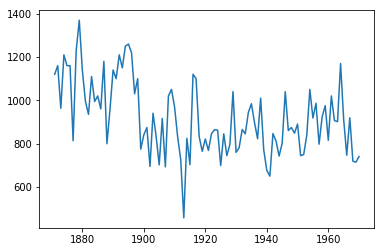

In [5]:
plt.plot(nile.year, nile.val)

## Let's take a look at the hmmlearn API

In [9]:
vals = np.expand_dims(nile.val.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [10]:
np.bincount(hidden_states)

array([72, 28])

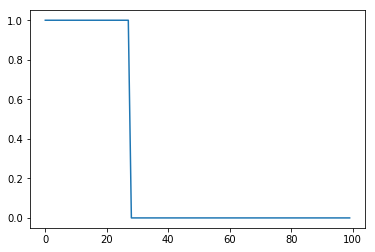

In [11]:
plt.plot(hidden_states)

## Exercise: how can we package this more conveniently?

In [32]:

def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
#     # re-order parameters in ascending order of mean of underlying distribution
#     idx      = np.argsort(mus)
#     mus      = mus[idx]
#     sigmas   = sigmas[idx]
#     transmat = transmat[idx, :][:, idx]
    
#     state_dict = {}
#     states = [i for i in range(n_states)]
#     for i in idx:
#         state_dict[i] = states[idx[i]]
    
#     relabeled_states = [state_dict[h] for h in hidden_states]
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [39]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 2)

[1097.15261711  850.75596948]
[133.74749638 124.44593534]


## Exercise: how might we be able to plot this more sensibly?

In [40]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    ax1.plot(time_vals, ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

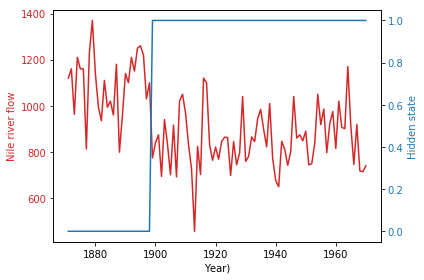

In [41]:
plot_states(nile.val, hidden_states, nile.year)

## Exercise: can we improve on the analysis above?

### Cut off the 'special' region

In [42]:
np.where(hidden_states == 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),)

In [43]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)


[1097.27279934  796.01723512  884.82315224]
[133.03503832  67.16297958 138.785672  ]


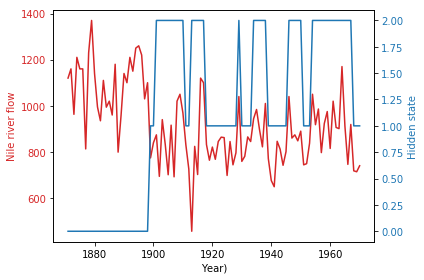

In [44]:
plot_states(nile.val, hidden_states, nile.year)

In [45]:
mus

array([1097.27279934,  796.01723512,  884.82315224])

In [46]:
np.set_printoptions(precision = 3, suppress = True)

In [47]:
transmat

array([[0.964, 0.036, 0.   ],
       [0.   , 0.509, 0.491],
       [0.   , 0.304, 0.696]])

In [48]:
mus

array([1097.273,  796.017,  884.823])

## Exercise: generate new synthetic data from the model and then fit it with a fresh HMM model

#### Easy to sample from an existing HMM model

In [49]:
res = np.squeeze(model.sample(1000)[0])

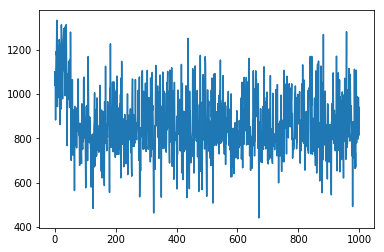

In [72]:
plt.plot(res)

#### Then refit

In [80]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)

[ 805.823 1118.994  875.002]
[ 60.68  129.921 143.171]


In [81]:
def plot_states_no_time(ts_vals, states):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time)')
    ax1.set_ylabel('Value',        color=color)
    ax1.plot(ts_vals,              color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(states,        color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

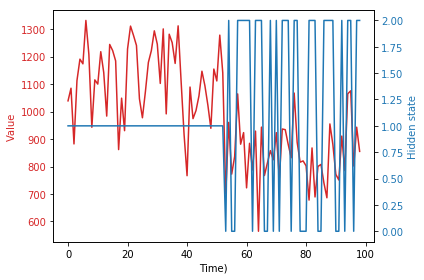

In [82]:
plot_states_no_time(res[1:100], hidden_states[1:100])

In [83]:
transmat

array([[0.323, 0.   , 0.677],
       [0.018, 0.981, 0.001],
       [0.313, 0.   , 0.687]])